<a href="https://colab.research.google.com/github/Akshit-Panapuzha/UCSD_Machine_Learning/blob/main/Project/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pandas-datareader --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 12.8 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [4]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [1]:
import math
import pandas_datareader as web 
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [9]:
#get stock
# import yfinance as yf
# start = '2014-01-01'
# end = '2022-01-01'
# symbol = 'GOOG'
# stock_data = yf.Ticker(symbol)
# stock_data = stock_data.history(start=start, end=end) 
# [['Open','High','Low','Close', 'Adj Close']]

# df = stock_data
# df
df = web.DataReader('GOOG', data_source = 'yahoo', start = '2014-01-01', end = '2022-01-01')


In [16]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,27.839401,27.603037,27.782366,27.724083,73129082.0,27.724083
2014-01-03,27.818977,27.520098,27.770908,27.521841,66917888.0,27.521841
2014-01-06,27.867046,27.557707,27.721344,27.828691,71037271.0,27.828691
2014-01-07,28.385853,27.924334,28.019974,28.365179,102486711.0,28.365179
2014-01-08,28.575891,28.226450,28.543015,28.424210,90036218.0,28.424210
...,...,...,...,...,...,...
2021-12-27,148.426498,147.250000,147.463501,148.063995,13256000.0,148.063995
2021-12-28,148.374496,145.935501,148.374496,146.447998,18624000.0,146.447998
2021-12-29,147.183746,145.504501,146.429504,146.504501,17022000.0,146.504501


In [17]:
#get num of rows and columns
df.shape

(2015, 6)

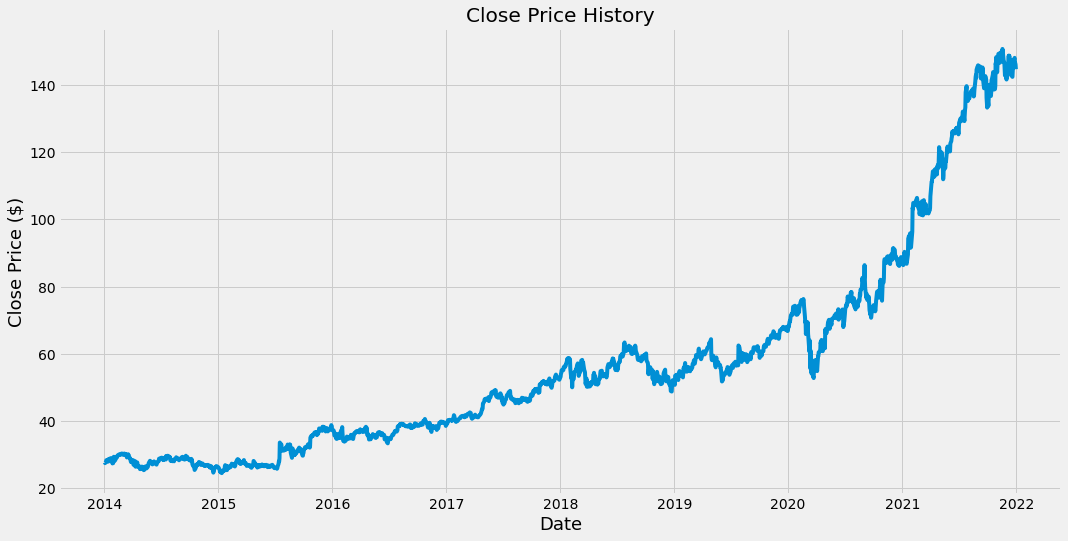

In [18]:
#visualize Closing Price history

plt.figure(figsize = (16, 8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price ($)', fontsize = 18)
plt.show()

In [19]:
data = df.filter(['Close'])
#conver data to a numpy

dataset = data.values

#get num of rows to train model
training_data_len = math.ceil(len(dataset) * .8)
print(training_data_len)
print(data.values)

1612
[[ 27.72408295]
 [ 27.52184105]
 [ 27.82869148]
 ...
 [146.50450134]
 [146.00250244]
 [144.67950439]]


In [20]:
#scale data - preprocessing
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.02508157],
       [0.02347837],
       [0.02591081],
       ...,
       [0.96667036],
       [0.96269095],
       [0.95220336]])

In [21]:
train_data = scaled_data[:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i - 60:i, 0])
  y_train.append(train_data[i, 0])
print(len(x_train), len(y_train))

1552 1552


In [22]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [23]:
#reshape x_train for modeling
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [24]:
#build LSTM Model

model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [25]:
#compile model

model.compile(optimizer='adam', loss='mean_squared_error')

In [26]:
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

1552/1552 [==============================] - 50s 30ms/step - loss: 3.5913e-04


In [27]:
#create test dataset
#new scaled values from 1552 to 2015

test_data = scaled_data[training_data_len - 60 :]

x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i - 60: i, 0])

In [28]:
print(len(x_test), len(y_test))

403 403


In [29]:
x_test = np.array(x_test)

In [30]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [31]:
#get models predicted price values
predictions = model.predict(x_test)
#predictions = predictions.reshape((predictions.shape[0],predictions.shape[1]*1))
predictions = scaler.inverse_transform(predictions)

13/13 [==============================] - 2s 35ms/step


In [32]:
#get rmse

rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

9.549726897966181

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


[]

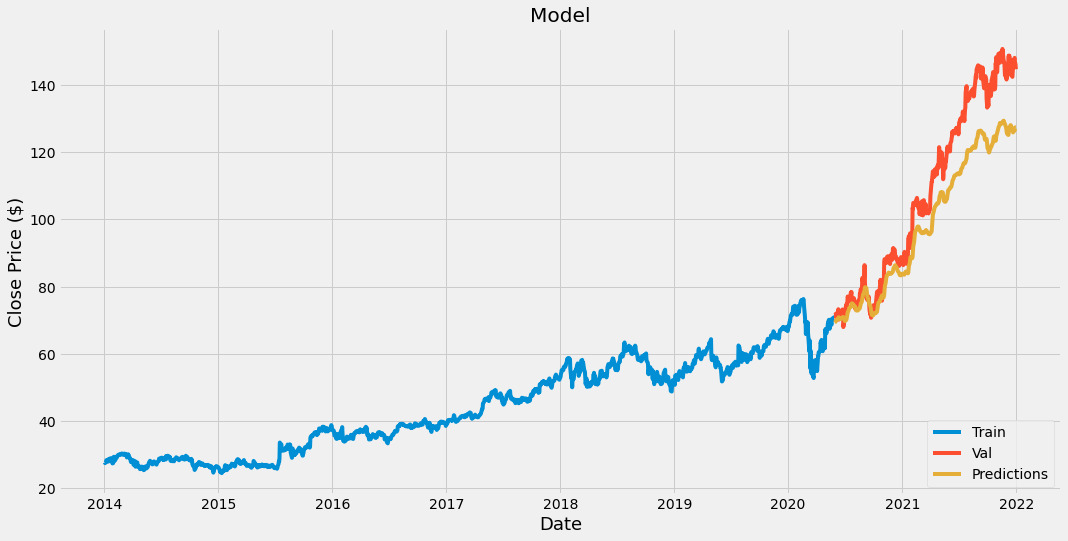

In [33]:
#plot data

train = data[:training_data_len]
valid = data = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize = (16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.plot()

In [34]:
valid[::-1]

,Close,Predictions
Date,,
2021-12-31,144.679504,127.413528
2021-12-30,146.002502,127.416733
2021-12-29,146.504501,127.273270
2021-12-28,146.447998,126.992958
2021-12-27,148.063995,126.468506
...,...,...
2020-06-04,70.609001,70.197426
2020-06-03,71.819000,70.013382
2020-06-02,71.960999,69.782906


In [40]:
#get quote
start = '2014-01-01'
end = '2022-01-01'
symbol = 'XLE'
stock_data = yf.Ticker(symbol)
stock_data = stock_data.history(start=start, end=end) 
[['Open','High','Low','Close', 'Adj Close']]

df = stock_data
df
goog_quote = web.DataReader('GOOG', data_source = 'yahoo', start = '2014-01-01', end = '2022-01-01')
new_df = goog_quote.filter(['Close'])

last_60_days = new_df[-60:].values
#scale data

last_60_days_scaled = scaler.transform(last_60_days)
#create empty
X_test = []
X_test.append(last_60_days_scaled)
#convert to numpy
X_test = np.array(X_test)
#reshape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#get predicted scaled price

pred_price = model.predict(X_test)
#undo scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 27ms/step
[[127.184395]]


In [58]:
goog_quote2 = web.DataReader('GOOG', data_source = 'yahoo', start = '2022-01-01', end = '2022-02-02')

In [59]:
print(goog_quote2['Close'])

Date
2022-01-03    145.074493
2022-01-04    144.416504
2022-01-05    137.653503
2022-01-06    137.550995
2022-01-07    137.004501
2022-01-10    138.574005
2022-01-11    140.017502
2022-01-12    141.647995
2022-01-13    139.130997
2022-01-14    139.786499
2022-01-18    136.290497
2022-01-19    135.651993
2022-01-20    133.506500
2022-01-21    130.091995
2022-01-24    130.371994
2022-01-25    126.735497
2022-01-26    129.240005
2022-01-27    129.121002
2022-01-28    133.289505
2022-01-31    135.698502
2022-02-01    137.878494
2022-02-02    148.036499
Name: Close, dtype: float64
